In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

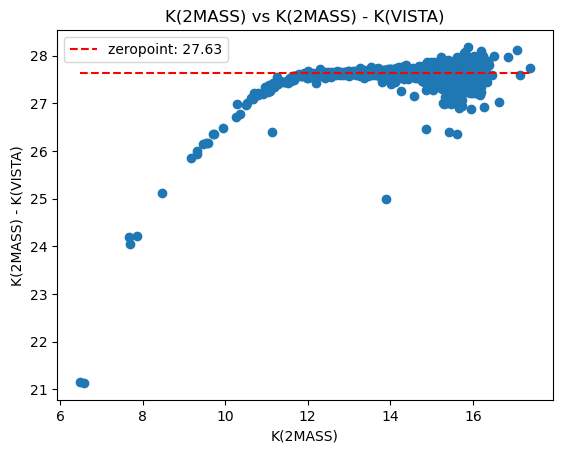

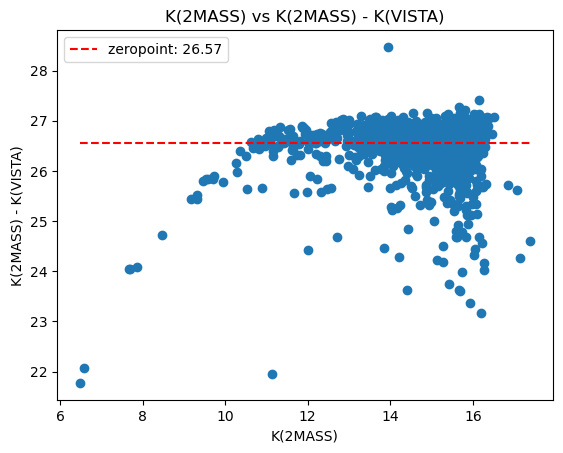

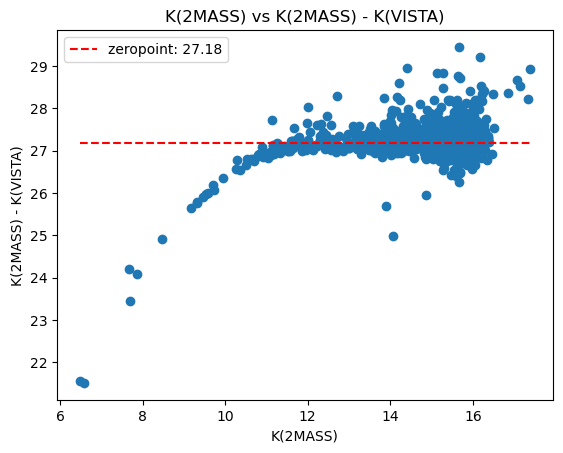

In [3]:
path = r"C:\Users\96fan\Desktop\OPC\Part 3\Sextractor results"
H_path = path + r"\H\match_H.csv"
J_path = path + r"\J\match_J.csv"
K_path = path + r"\K\match_K.csv"

def zp(path):
    df = pd.read_csv(path, delimiter=r',', header=0)
    pd.set_option('display.max_columns', None)
    #print(df.head())

    H_2MASS = df['Hmag']
    H_VISTA = df['MAG_APER'] #Check whether I need to use MAG_APER or MAG_AUTO
    H_diff = H_2MASS - H_VISTA 

    plt.scatter(H_2MASS, H_diff)
    x = np.linspace(min(H_2MASS), max(H_2MASS), 100)
    plt.plot(x, np.median(H_diff)+0*x, color='red', linestyle='--', label=f'zeropoint: {np.median(H_diff):.2f}')
    plt.xlabel('K(2MASS)')
    plt.ylabel('K(2MASS) - K(VISTA)')
    plt.title('K(2MASS) vs K(2MASS) - K(VISTA)')
    plt.legend()
    plt.show()

    return np.mean(H_diff), np.median(H_diff), np.std(H_diff)

zp_H = zp(H_path)
zp_J = zp(J_path)
zp_K = zp(K_path)

In [4]:
with fits.open(r"C:\Users\96fan\Desktop\OPC\Part 3\Data\Control_field.fits") as hdul:
    hdul.info()
    control_field = hdul[1].data
    control_field = np.array([list(row) for row in control_field])
    #check the columns of the bands
    control_field_df = pd.DataFrame(control_field, columns=['RA', 'DEC', 'J', 'J_err', 'H', 'H_err', 'Ks', 'Ks_err', 'Class_sex'])
    control_field_df.to_csv('control_field.csv', index=False)

Filename: C:\Users\96fan\Desktop\OPC\Part 3\Data\Control_field.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (1460,)   uint8   
  1  Joined        1 BinTableHDU     36   93909R x 9C   [D, D, E, E, E, E, E, E, D]   


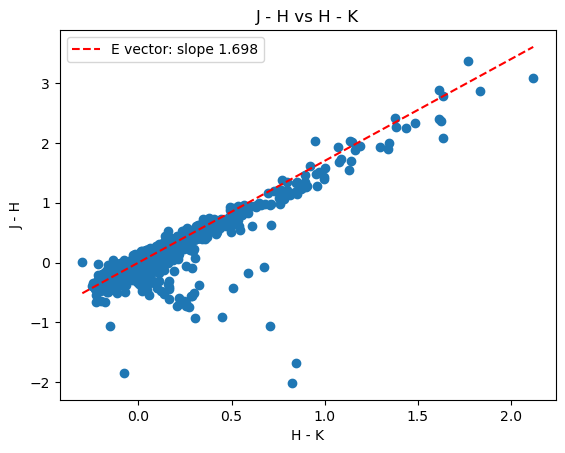

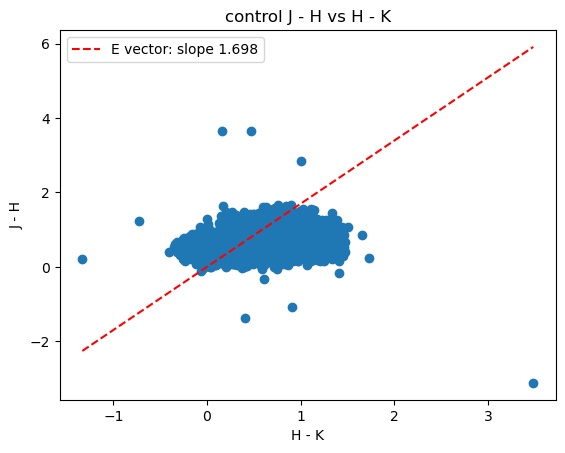

In [5]:
path = r"C:\Users\96fan\Desktop\OPC\Part 3\Sextractor results\match_all.csv"
df_all = pd.read_csv(path, delimiter=r',', header=0)
#print(df_all.head())

J_minus_H = (df_all['MAG_APER_2'] + zp_J[1]) - (df_all['MAG_APER_1'] + zp_H[1])
H_minus_K = (df_all['MAG_APER_1'] + zp_H[1]) - (df_all['MAG_APER_3'] + zp_K[1])

plt.scatter(H_minus_K, J_minus_H)
# Plot a line with the slope 1.698 that goes through (0, 0)
x = np.linspace(min(H_minus_K), max(H_minus_K), 100)
y = 1.698 * x
plt.plot(x, y, color='red', linestyle='--', label='E vector: slope 1.698')
plt.xlabel('H - K')
plt.ylabel('J - H')
plt.title('J - H vs H - K')
plt.legend()
plt.show()

control_J_minus_H = control_field_df['J'] - control_field_df['H']
control_H_minus_K = control_field_df['H'] - control_field_df['Ks']

plt.scatter(control_H_minus_K, control_J_minus_H)
x = np.linspace(min(control_H_minus_K), max(control_H_minus_K), 100)
y = 1.698 * x
plt.plot(x, y, color='red', linestyle='--', label='E vector: slope 1.698')
plt.xlabel('H - K')
plt.ylabel('J - H')
plt.title('control J - H vs H - K')
plt.legend()
plt.show()

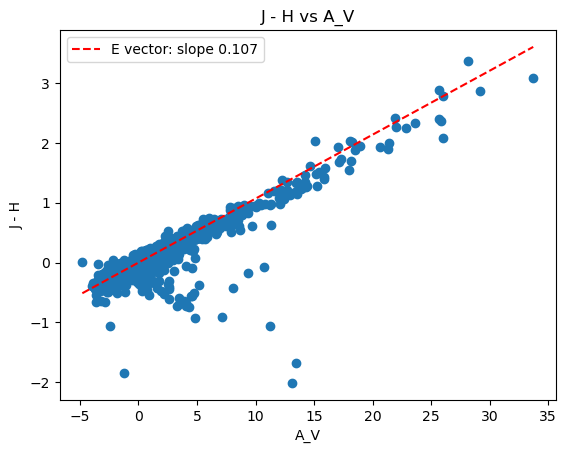

C:\Users\96fan\AppData\Local\Temp\ipykernel_6432\3570513656.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


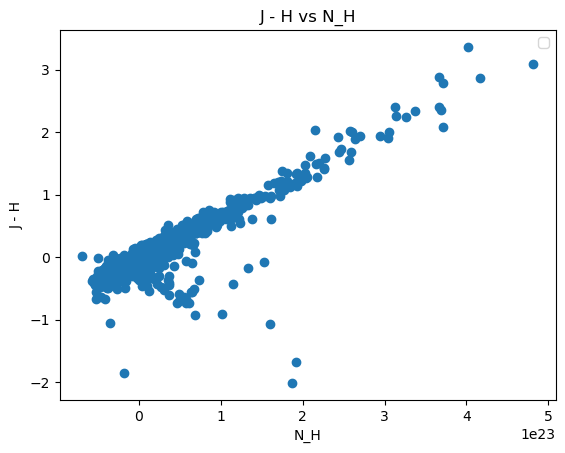

In [6]:
A_V = 15.9*H_minus_K
plt.scatter(A_V, J_minus_H)
# Plot a line with the slope 1.698 that goes through (0, 0)
x = np.linspace(min(A_V), max(A_V), 100)
y = 1.698/15.9 * x
plt.plot(x, y, color='red', linestyle='--', label='E vector: slope 0.107')
plt.xlabel('A_V')
plt.ylabel('J - H')
plt.title('J - H vs A_V')
plt.legend()
plt.show()

def column_density(A_V):
    return 14.3e21 * A_V - 0.63e21 

N_H = column_density(A_V)
plt.scatter(N_H, J_minus_H)
plt.xlabel('N_H')
plt.ylabel('J - H')
plt.title('J - H vs N_H')
plt.legend()
plt.show()

4.815990330000006e+23 -6.925026599999921e+22
1191
X_IMAGE_1               3165.9209
Y_IMAGE_1               4497.9956
FLAGS_1                         0
ALPHA_J2000_1           285.56105
DELTA_J2000_1          -37.009234
FWHM_WORLD_1             0.000449
MAG_APER_1               -12.1161
MAGERR_APER_1              0.0025
MAG_AUTO_1               -12.2783
MAGERR_AUTO_1              0.0053
_RAJ2000_1             285.561033
_DEJ2000_1             -37.009129
_r_1                     0.175733
RAJ2000_1              285.561033
DEJ2000_1              -37.009129
2MASS_1          19021464-3700328
Jmag_1                     17.818
e_Jmag_1                      NaN
Hmag_1                     15.663
e_Hmag_1                    0.132
Kmag_1                     12.952
e_Kmag_1                     0.03
Qflg_1                        UBA
Rflg_1                         22
Bflg_1                         11
Cflg_1                        000
Xflg_1                          0
Aflg_1                          

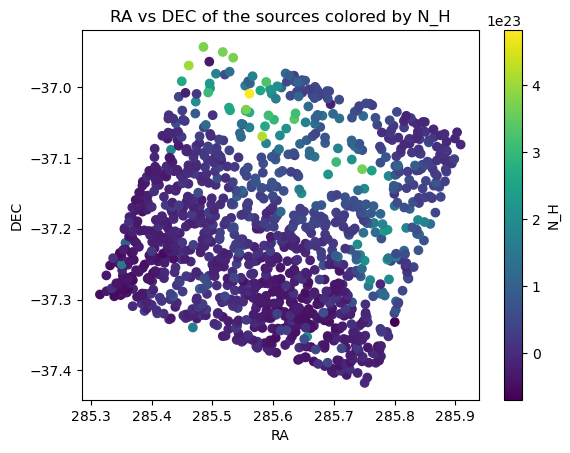

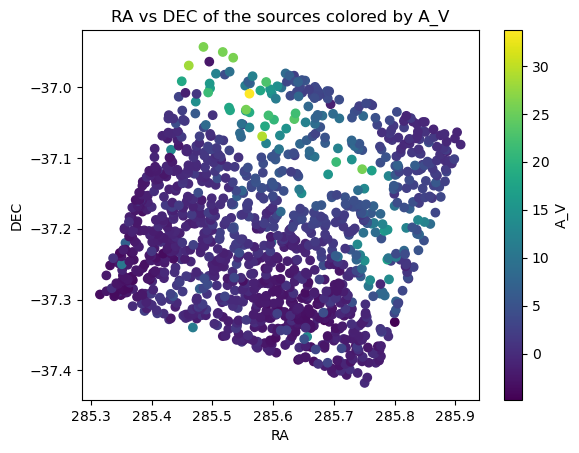

In [8]:
print(np.max(N_H), np.min(N_H))
max_index = N_H.idxmax()
print(max_index)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_all.iloc[max_index])


plt.scatter(df_all['ALPHA_J2000_1'], df_all['DELTA_J2000_1'], c=N_H, cmap='viridis')
plt.colorbar(label='N_H')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('RA vs DEC of the sources colored by N_H')
plt.show()

plt.scatter(df_all['ALPHA_J2000_1'], df_all['DELTA_J2000_1'], c=A_V, cmap='viridis')
plt.colorbar(label='A_V')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('RA vs DEC of the sources colored by A_V')
plt.show()




